In [13]:
import pandas as pd

# 1. Leer el CSV
ruta_csv = 'csv_horarios/horarios_validos.csv'
df = pd.read_csv(ruta_csv)

# 2. Ver las primeras filas para entender los datos
print("Primeras filas del DataFrame:")
df.head()

Primeras filas del DataFrame:


,#horario,Curso,ID Liga,NRC,Día,Hora Inicio,Hora Fin,Docente
0,1,ISIA-112,T1,9607,Martes,07:00,07:50,CABALLERO ALVARADO ARMANDO JAVIER
1,1,ISIA-112,T1,9607,Martes,07:55,08:45,CABALLERO ALVARADO ARMANDO JAVIER
2,1,ISIA-112,P1,9608,Martes,08:50,09:40,CABALLERO ALVARADO ARMANDO JAVIER
3,1,ISIA-112,P1,9608,Martes,09:45,10:35,CABALLERO ALVARADO ARMANDO JAVIER
4,1,ISIA-112,L1,9609,Martes,10:40,11:30,CABALLERO ALVARADO ARMANDO JAVIER


In [14]:
# 3. Ver información general del DataFrame
print("\nInformación del DataFrame:")
df.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #horario     2800 non-null   int64 
 1   Curso        2800 non-null   object
 2   ID Liga      2800 non-null   object
 3   NRC          2800 non-null   int64 
 4   Día          2800 non-null   object
 5   Hora Inicio  2800 non-null   object
 6   Hora Fin     2800 non-null   object
 7   Docente      2800 non-null   object
dtypes: int64(2), object(6)
memory usage: 175.1+ KB


In [15]:
# 4. Verificar si hay valores nulos
print("\nValores nulos por columna:")
df.isnull().sum()


Valores nulos por columna:


#horario       0
Curso          0
ID Liga        0
NRC            0
Día            0
Hora Inicio    0
Hora Fin       0
Docente        0
dtype: int64

In [16]:
# 5. Ver tipos de datos
print("\nTipos de datos:")
df.dtypes


Tipos de datos:


#horario        int64
Curso          object
ID Liga        object
NRC             int64
Día            object
Hora Inicio    object
Hora Fin       object
Docente        object
dtype: object

In [18]:
import pandas as pd

# Leer el archivo CSV
file_path = "csv_horarios/horarios_validos.csv"
df = pd.read_csv(file_path)

# Convertir columnas de hora a formato datetime
df["Hora Inicio"] = pd.to_datetime(df["Hora Inicio"], format="%H:%M")
df["Hora Fin"] = pd.to_datetime(df["Hora Fin"], format="%H:%M")

# Calcular la duración de las sesiones en minutos
df["Duración"] = (df["Hora Fin"] - df["Hora Inicio"]).dt.total_seconds() / 60

# Generar estadísticas
# 1. Total de sesiones por curso
total_sesiones_por_curso = df["Curso"].value_counts()

# 2. Cantidad de sesiones por docente
sesiones_por_docente = df["Docente"].value_counts()

# 3. Distribución de sesiones por día
sesiones_por_dia = df["Día"].value_counts()

# 4. Promedio de duración de las sesiones
promedio_duracion = df["Duración"].mean()


# Imprimir estadísticas
print("Total de sesiones por curso:\n", total_sesiones_por_curso)
print("\nSesiones por docente:\n", sesiones_por_docente)
print("\nSesiones por día:\n", sesiones_por_dia)
print("\nPromedio de duración de sesiones (minutos):", promedio_duracion)


Total de sesiones por curso:
 Curso
ISIA-112    600
ISIA-108    600
ISIA-110    600
ISIA-107    600
ISIA-113    400
Name: count, dtype: int64

Sesiones por docente:
 Docente
CABALLERO ALVARADO ARMANDO JAVIER    600
ABANTO CABRERA HEBER GERSON          592
LETURIA RODRIGUEZ WALTER IVAN        408
CUEVA CHAVEZ WALTER MANUEL           400
MENDOZA CORPUS CARLOS ALFREDO        308
SAGASTEGUI CHIGNE TEOBALDO HERNAN    292
CHÁVEZ FERNÁNDEZ EDILBERTO CÉSAR     200
Name: count, dtype: int64

Sesiones por día:
 Día
MAR          616
JUE          532
LUN          380
MIE          340
VIE          318
Martes       120
Viernes      120
Jueves       116
Lunes        100
Miércoles     80
SAB           54
Sábado        24
Name: count, dtype: int64

Promedio de duración de sesiones (minutos): 50.0


In [41]:
import pandas as pd

# 1. Leer el archivo CSV
ruta_csv = 'csv_horarios/horarios_validos.csv'
df = pd.read_csv(ruta_csv)

# 2. Convertir columnas de hora a formato datetime
df["Hora Inicio"] = pd.to_datetime(df["Hora Inicio"], format="%H:%M")
df["Hora Fin"] = pd.to_datetime(df["Hora Fin"], format="%H:%M")

# 3. Crear una columna para el puntaje individual
df["Puntaje"] = 0

# 4. Asignar puntos por cursos en la mañana (7 am - 12 pm)
df["Puntaje"] += df["Hora Inicio"].apply(lambda x: 1 if 7 <= x.hour < 12 else 0)

# 5. Ordenar los horarios por día y hora de inicio
df = df.sort_values(by=["#horario", "Día", "Hora Inicio"]).reset_index(drop=True)

# 6. Asignar puntos por separación no mayor a 2 horas entre cursos dentro del mismo horario
for i in range(1, len(df)):
    if df.loc[i, "#horario"] == df.loc[i - 1, "#horario"]:  # Mismo horario
        if df.loc[i, "Día"] == df.loc[i - 1, "Día"]:  # Mismo día
            diferencia = (df.loc[i, "Hora Inicio"] - df.loc[i - 1, "Hora Fin"]).total_seconds() / 3600
            if 0 <= diferencia <= 2:  # Diferencia menor o igual a 2 horas
                df.loc[i, "Puntaje"] += 1

# 7. Calcular el puntaje total por horario completo
puntaje_por_horario = df.groupby("#horario")["Puntaje"].sum().reset_index()
puntaje_por_horario.rename(columns={"Puntaje": "Puntaje Total"}, inplace=True)

# 8. Unir el puntaje total al DataFrame original
df = df.merge(puntaje_por_horario, on="#horario")

# 9. Filtrar los horarios con puntaje total mayor a 40
horarios_filtrados = puntaje_por_horario[puntaje_por_horario["Puntaje Total"] > 40]

# 10. Mostrar los horarios con puntaje total mayor a 40
print("\nHorarios con puntaje total mayor a 40:")
print(horarios_filtrados)

# 11. (Opcional) Guardar los resultados en un archivo CSV
horarios_filtrados.to_csv("horarios_puntaje_mayor_40.csv", index=False)


Horarios con puntaje total mayor a 40:
    #horario  Puntaje Total
2          3             41
3          4             41
6          7             41
17        18             45
18        19             45
20        21             45
21        22             45
57        58             44
58        59             44
60        61             44
61        62             44
88        89             41


# Clasificación de horario optimo

In [49]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Cargar datos
df = pd.read_csv("csv_horarios/horarios_validos.csv")

# Crear variable objetivo: ¿Es horario de mañana? (7:00-12:00)
df['Hora Inicio'] = pd.to_datetime(df['Hora Inicio']).dt.hour
df['Horario_Optimo'] = df['Hora Inicio'].apply(lambda x: 1 if 7 <= x < 12 else 0)

# Codificar variables categóricas
le_curso = LabelEncoder()
le_dia = LabelEncoder()
df['Curso_encoded'] = le_curso.fit_transform(df['Curso'])
df['Dia_encoded'] = le_dia.fit_transform(df['Día'])

# Variables predictoras
X = df[['Curso_encoded', 'Dia_encoded']]
y = df['Horario_Optimo']

C:\Users\leoro\AppData\Local\Temp\ipykernel_28016\164936509.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hora Inicio'] = pd.to_datetime(df['Hora Inicio']).dt.hour


In [50]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar árbol
modelo_horario = DecisionTreeClassifier(max_depth=3, criterion='entropy')
modelo_horario.fit(X_train, y_train)

# Evaluar
print("Precisión:", modelo_horario.score(X_test, y_test))

Precisión: 0.8071428571428572


In [51]:
# Codificar docente y tipo de sesión (T/P/L)
le_docente = LabelEncoder()
le_sesion = LabelEncoder()
df['Docente_encoded'] = le_docente.fit_transform(df['Docente'])
df['Tipo_Sesion'] = df['ID Liga'].str.extract(r'([A-Z])')[0]  # Extraer T, P, L
df['Tipo_Sesion_encoded'] = le_sesion.fit_transform(df['Tipo_Sesion'])

# Variables predictoras
X = df[['Curso_encoded', 'Dia_encoded', 'Hora Inicio', 'Tipo_Sesion_encoded']]
y = df['Docente_encoded']

In [52]:
modelo_docente = DecisionTreeClassifier(max_depth=4)
modelo_docente.fit(X, y)  # Usamos todos los datos para patrones

# Exportar árbol para visualización
from sklearn.tree import export_text
print(export_text(modelo_docente, feature_names=['Curso', 'Día', 'Hora', 'Tipo_Sesion']))

|--- Curso <= 2.50
|   |--- Curso <= 1.50
|   |   |--- Curso <= 0.50
|   |   |   |--- Tipo_Sesion <= 1.00
|   |   |   |   |--- class: 4
|   |   |   |--- Tipo_Sesion >  1.00
|   |   |   |   |--- class: 2
|   |   |--- Curso >  0.50
|   |   |   |--- Tipo_Sesion <= 1.50
|   |   |   |   |--- class: 5
|   |   |   |--- Tipo_Sesion >  1.50
|   |   |   |   |--- class: 6
|   |--- Curso >  1.50
|   |   |--- Día <= 4.00
|   |   |   |--- class: 0
|   |   |--- Día >  4.00
|   |   |   |--- Hora <= 13.50
|   |   |   |   |--- class: 0
|   |   |   |--- Hora >  13.50
|   |   |   |   |--- class: 4
|--- Curso >  2.50
|   |--- Curso <= 3.50
|   |   |--- class: 1
|   |--- Curso >  3.50
|   |   |--- class: 3



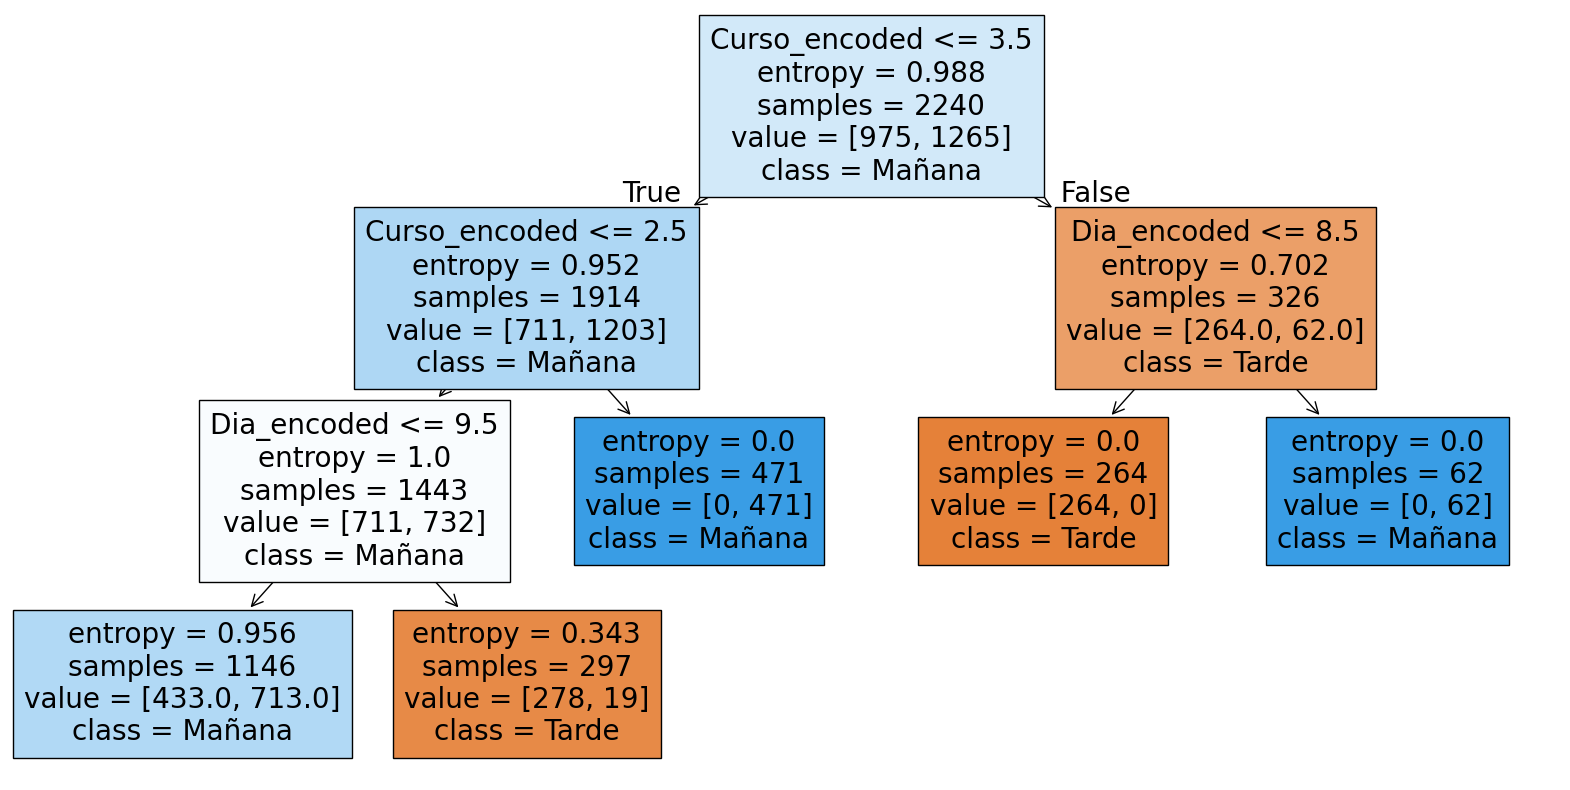

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(modelo_horario, feature_names=X.columns, class_names=['Tarde', 'Mañana'], filled=True)
plt.show()